# Time Domain Future Extraction


- Author: Elmo Chavez
- Date: 18-Jul-2023

**Description**

> Bla bla bla


## Read the Dataset


Libraries


In [1]:
import mne
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Set the path to read the data


Using Google Colab from Google Drive


In [ ]:
from google.colab import drive 

drive.mount('/content/drive')

path = '/content/drive/MyDrive/EEG_Dataset/ds004504/derivatives/'

items = os.listdir(path)
dir_list = [item for item in items if os.path.isdir(os.path.join(path, item))]

print(len(dir_list))
print(dir_list[:5])

Using local Environment from a local directory


In [2]:
from tkinter import Tk
from tkinter.filedialog import askdirectory

root = Tk()
root.withdraw()

path = askdirectory()

root.quit()
root.destroy()

2023-07-19 00:35:06.005 python[46601:1094050] +[CATransaction synchronize] called within transaction


### Reading Datasets


Read participants information


In [3]:
filename_part = 'participants.tsv'

df_partipants = pd.read_csv(path+'/'+filename_part, sep='\t')
df_partipants.head()

,participant_id,Gender,Age,Group,MMSE
0,sub-001,F,57,A,16
1,sub-002,F,78,A,22
2,sub-003,M,70,A,14
3,sub-004,F,67,A,20
4,sub-005,M,70,A,22


Read EEG Data


In [4]:
items = os.listdir(path+'/derivatives/')
dir_list = [item for item in items if os.path.isdir(os.path.join(path, item))]
dir_list.sort()

print('Subjects found:',len(dir_list))
print('Subjects:', dir_list[:5])

eeg_data = []

for l in dir_list:
  folder = path+'/derivatives/'+l+'/eeg/'
  f = l+'_task-eyesclosed_eeg.set'
  #print(l)
  r = mne.io.read_raw_eeglab(folder+f, preload=False, verbose='CRITICAL')
  participant_info = {'id': l}
  r.info['subject_info'] = participant_info
  eeg_data.append(r)

print('EEG Files Loaded:',len(eeg_data))

Subjects found: 88
Subjects: ['sub-001', 'sub-002', 'sub-003', 'sub-004', 'sub-005']
EEG Files Loaded: 88


## Pre-Select EEG Datasets


Number of Subjects by Classes


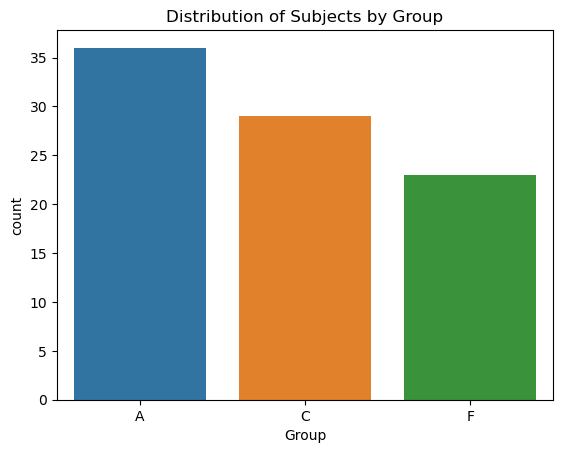

In [5]:
sns.countplot(x=df_partipants["Group"])
plt.title('Distribution of Subjects by Group')
plt.show()

Time Maximum Record by Subject


Average Max Time: 793.53


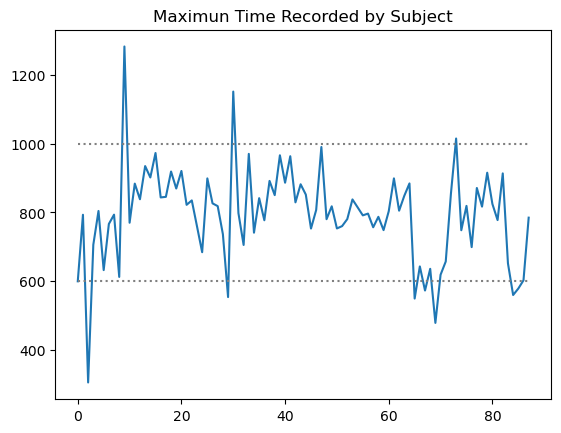

In [6]:
time_max = []

for r in eeg_data:
  time_max.append(r.tmax)

const_min = np.full(len(eeg_data),600)
const_max = np.full(len(eeg_data),1000)

print('Average Max Time:', round(np.average(time_max),2))

plt.plot(time_max)
plt.plot(const_min, linestyle='dotted', c='gray')
plt.plot(const_max, linestyle='dotted', c='gray')

plt.title('Maximun Time Recorded by Subject')
plt.show()

Select only EEG Data from Subjects of Alzheimer and Frontotemporal Dementia and limite the datasets with at least 600 seconds recorded.


In [10]:
df_partipants_ad_ftd = df_partipants[df_partipants['Group'].isin(['A','F'])]

# Encoding Gender, Groups (Classes)
gender_dict = {'M':0, 'F':1}
group_dict = {'A':0, 'F':1}

df_partipants_ad_ftd['Gender'] = df_partipants_ad_ftd['Gender'].replace(gender_dict)
df_partipants_ad_ftd['Group'] = df_partipants_ad_ftd['Group'].replace(group_dict)

print('Subjects from Alzheimer and Fronto Temporal Dementia datasets:',len(df_partipants_ad_ftd))
df_partipants_ad_ftd.head()

Subjects from Alzheimer and Fronto Temporal Dementia datasets: 59


/var/folders/42/zkw31xg11x1f6dpl9zz6hmz00000gn/T/ipykernel_46601/942251154.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_partipants_ad_ftd['Gender'] = df_partipants_ad_ftd['Gender'].replace(gender_dict)
/var/folders/42/zkw31xg11x1f6dpl9zz6hmz00000gn/T/ipykernel_46601/942251154.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_partipants_ad_ftd['Group'] = df_partipants_ad_ftd['Group'].replace(group_dict)


,participant_id,Gender,Age,Group,MMSE
0,sub-001,1,57,0,16
1,sub-002,1,78,0,22
2,sub-003,0,70,0,14
3,sub-004,1,67,0,20
4,sub-005,0,70,0,22


In [11]:
eeg_data_filtered = []
list_participants_id = []

for r in eeg_data:
  # Filtering EEG Data from only Alzheimer and Fronto Temporal Dementia subjects
  if r.info['subject_info']['id'] in df_partipants_ad_ftd['participant_id'].tolist():
    # Filtering EEG Datasets with at least 600 seconds of data recorded.
    if r.tmax >= 600:
      eeg_data_filtered.append(r)
      list_participants_id.append(r.info['subject_info']['id'])

df_partipants_ad_ftd = df_partipants_ad_ftd[df_partipants_ad_ftd['participant_id'].isin(list_participants_id)]
df_partipants_ad_ftd.reset_index(inplace=True, drop=True)

print('Participants Info:',len(df_partipants_ad_ftd))
print('EEG Data Subjects:',len(eeg_data_filtered))
df_partipants_ad_ftd.head()

Participants Info: 51
EEG Data Subjects: 51


,participant_id,Gender,Age,Group,MMSE
0,sub-002,1,78,0,22
1,sub-004,1,67,0,20
2,sub-005,0,70,0,22
3,sub-006,1,61,0,14
4,sub-007,1,79,0,20


Remove unused variables to free up memory space


In [12]:
del df_partipants, eeg_data, const_max, const_min, time_max, items, dir_list

## Define Epochs


In [13]:
print(eeg_data_filtered[0].ch_names)

['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']


Epochs for only Fronto Temporal Channels


In [14]:
start_time = 0
end_time = 600

duration = 60.0
overlapping = 20.0

channels_picked = ['Fp1']

epochs = []

for raw in eeg_data_filtered:
  ep = mne.make_fixed_length_epochs(raw.copy().pick(channels_picked).crop(tmin=start_time, tmax=end_time),
                                    duration=duration, overlap=overlapping, preload=False, verbose='CRITICAL')
  epochs.append(ep)

print('Epochs created:', len(epochs[0].events))
print('Subjects with Epochs:', len(epochs))

Epochs created: 14
Subjects with Epochs: 51


Using data from preloaded Raw for 14 events and 30000 original time points ...
0 bad epochs dropped
Not setting metadata
14 matching events found
No baseline correction applied
0 projection items activated


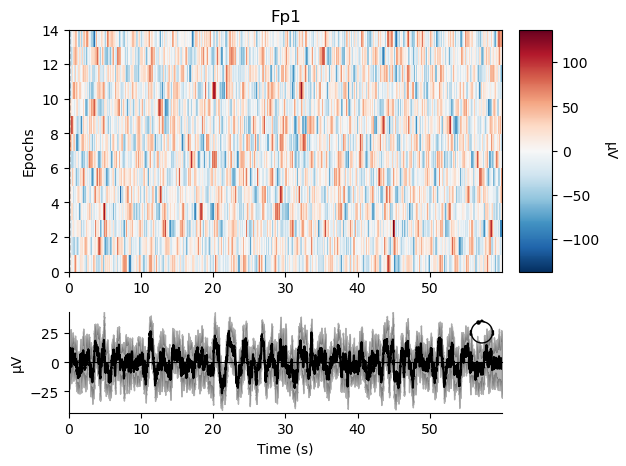

In [15]:
fig = epochs[0].plot_image(picks=channels_picked)
plt.show()

Validate if the last epoch contain all the points


In [16]:
print('Epochs shape:',epochs[0].get_data().shape,'\n')
print('Last Epoch shape:',epochs[0].get_data()[13:,:,:].shape)

Using data from preloaded Raw for 14 events and 30000 original time points ...
Epochs shape: (14, 1, 30000) 

Using data from preloaded Raw for 14 events and 30000 original time points ...
Last Epoch shape: (1, 1, 30000)


## Support Functions


In [17]:
# Function to get PSD Features from Epochs as a dataframe
def PSD_Features_from_Epochs(epoch, sfreq = 500, fmin=0.5, fmax=50):
    features = []
    for ep in epoch:
        epoch_fft = np.abs(np.fft.fft(ep))
        psd, freqs = mne.time_frequency.psd_array_welch(epoch_fft, sfreq=sfreq, verbose='CRITICAL')

        freq_mask = np.logical_and(freqs >= fmin, freqs <= fmax)
        band_psd = psd[:, freq_mask]
        
        # Features
        total_power = np.sum(band_psd, axis=1)
        avg_power = np.mean(band_psd, axis=1)
        relative_power = np.divide(total_power, np.sum(psd, axis=1))
        peak_freq = freqs[freq_mask][np.argmax(band_psd, axis=1)]
        spectral_entropy = -np.sum(np.log(band_psd) * band_psd, axis=1)
        
        epoch_features = {}
        
        epoch_features['total_power'] = total_power
        epoch_features['avg_power'] = avg_power
        epoch_features['relative_power'] = relative_power
        epoch_features['peak_freq'] = peak_freq
        epoch_features['spectral_entropy'] = spectral_entropy
        
        features.append(epoch_features)

    features_array = np.array([tuple(f.values()) for f in features],
                            dtype=list(zip(features[0].keys(), ['float'] * len(features[0]))))
    
    return features_array

## PSD Feature Extraction from Epochs


In [23]:
sfreq = eeg_data_filtered[0].info['sfreq']
fmin = 1
fmax = 50

psd_features = []

for i, row in df_partipants_ad_ftd.iterrows():
    epoch = epochs[i]
    features_array = PSD_Features_from_Epochs(epoch, sfreq, fmin, fmax)
    df = pd.DataFrame(features_array)
    
    df['subject_id'] = row['participant_id']
    df['age'] = row['Age']
    df['gender'] = row['Gender']
    df['group'] = row['Group']
    
    psd_features.append(df)

df_epochs_psd_features = pd.concat(psd_features)
df_epochs_psd_features.reset_index(inplace=True)
df_epochs_psd_features.rename(columns={'index':'epoch_id'}, inplace=True)
df_epochs_psd_features = df_epochs_psd_features[['subject_id','age','gender','epoch_id','total_power','avg_power','relative_power','peak_freq','spectral_entropy','group']]

df_epochs_psd_features.head(20)

/var/folders/42/zkw31xg11x1f6dpl9zz6hmz00000gn/T/ipykernel_46601/1045183176.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  features_array = np.array([tuple(f.values()) for f in features],
/var/folders/42/zkw31xg11x1f6dpl9zz6hmz00000gn/T/ipykernel_46601/1045183176.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  features_array = np.array([tuple(f.values()) for f in features],
/var/folders/42/zkw31xg11x1f6dpl9zz6hmz00000gn/T/ipykernel_46601/1045183176.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before perfor

,subject_id,age,gender,epoch_id,total_power,avg_power,relative_power,peak_freq,spectral_entropy,group
0,sub-002,78,1,0,8.138737e-07,3.255495e-08,0.480204,1.953125,0.000013,0
1,sub-002,78,1,1,6.457802e-07,2.583121e-08,0.373726,1.953125,0.000010,0
2,sub-002,78,1,2,7.862074e-07,3.144830e-08,0.397717,1.953125,0.000013,0
3,sub-002,78,1,3,8.496011e-07,3.398405e-08,0.458611,1.953125,0.000013,0
4,sub-002,78,1,4,7.503180e-07,3.001272e-08,0.402417,1.953125,0.000012,0
5,sub-002,78,1,5,7.952553e-07,3.181021e-08,0.405154,1.953125,0.000013,0
6,sub-002,78,1,6,1.075596e-06,4.302383e-08,0.513803,1.953125,0.000016,0
7,sub-002,78,1,7,1.105047e-06,4.420189e-08,0.501031,1.953125,0.000017,0
8,sub-002,78,1,8,1.064963e-06,4.259850e-08,0.479352,1.953125,0.000016,0
9,sub-002,78,1,9,8.609200e-07,3.443680e-08,0.432345,1.953125,0.000013,0


Save Dataframe as CSV file


In [25]:
df_epochs_psd_features.to_csv(os.getcwd()+'/Feature_Extraction/epoch_psd_features.csv', index=False)